<a href="https://colab.research.google.com/github/maressakaren/Reconhecimento_de_emocoes_em_tweets/blob/main/graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install pandas
!pip install tqdm


In [ ]:
from datasets import load_dataset
import pandas as pd
from collections import Counter
import nltk
import re
import numpy as np
import spacy
from tqdm import tqdm
from nltk.corpus import stopwords
from unicodedata import normalize
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
nltk.download('all')
import matplotlib.pyplot as plt

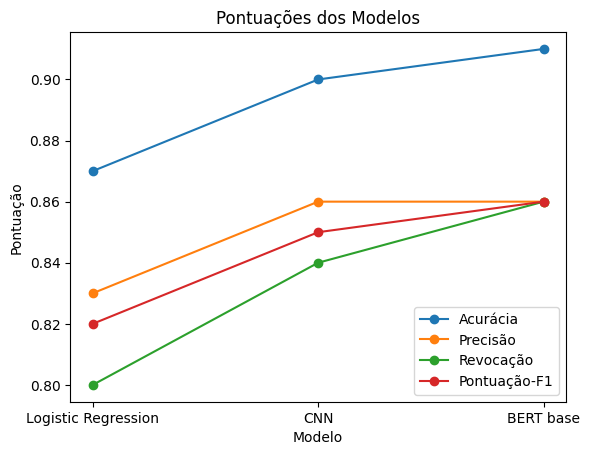

In [ ]:
import matplotlib.pyplot as plt

# Dados
modelos = ['Logistic Regression', 'CNN', 'BERT base']
acuracia = [0.87, 0.90, 0.91]
precisao = [0.83, 0.86, 0.86]
revocacao = [0.80, 0.84, 0.86]
f1 = [0.82, 0.85, 0.86]

# Configuração do gráfico
plt.plot(modelos, acuracia, marker='o', label='Acurácia')
plt.plot(modelos, precisao, marker='o', label='Precisão')
plt.plot(modelos, revocacao, marker='o', label='Revocação')
plt.plot(modelos, f1, marker='o', label='Pontuação-F1')

plt.xlabel('Modelo')
plt.ylabel('Pontuação')
plt.title('Pontuações dos Modelos')
plt.legend()

# Exibir o gráfico
plt.show()


In [ ]:
def amount_words(dataset):
  count=0
  for tweet in dataset:
    count+= len(tweet.split())

  print(count)
  return count/len(dataset)

In [ ]:
dataset = load_dataset("dair-ai/emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:

tweets_train = dataset['train']['text']
tweets_validation = dataset['validation']['text']
tweets_test = dataset['test']['text']
#print(amount_words(tweets_train))
labels_train = dataset['train']['label']
labels_validation = dataset['validation']['label']
labels_test = dataset['test']['label']



In [ ]:
def gera_grafico(list):
  colormap = plt.cm.get_cmap('Greens')
  colors = colormap(np.linspace(0.2,1,len(counts)))

  fig, ax = plt.subplots()
  plt.xlabel('Adjetivos mais utilizados')
  plt.ylabel('Frequencia')
  plt.title("\nTweets classificados como " + feel + "\n")
  plt.xticks(rotation = 45, ha = 'right')
  for i, bar in enumerate(ax.bar(words,counts,color= colors)):
      ax.annotate(str(counts[i]), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

In [ ]:
def get_top_words_by_emotion(texts, labels, emotion,feel, top_n=10):
    word_list = []

    for text, label in zip(texts, labels):
        if label == emotion:
            words = word_tokenize(text.lower())
            filtered_words = [word for word, tag in pos_tag(words) if tag.startswith('JJ')]
            word_list += filtered_words

    word_counts = Counter(word_list)
    top_words = word_counts.most_common(top_n)
    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]
    colormap = plt.cm.get_cmap('Greens')
    colors = colormap(np.linspace(0.2,1,len(counts)))

    fig, ax = plt.subplots()
    plt.xlabel('Adjetivos mais utilizados')
    plt.ylabel('Frequencia')
    plt.title("\nTweets classificados como " + feel + "\n")
    plt.xticks(rotation = 45, ha = 'right')
    for i, bar in enumerate(ax.bar(words,counts,color= colors)):
      ax.annotate(str(counts[i]), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')
    return top_words

def preprocessar_tweets(tweets):
    stop_words = set(stopwords.words('english'))
    repetition_pattern = re.compile(r'(.)\1\1+')
    new_tweets = []
    with tqdm(total=len(tweets), colour='green', desc='Processando') as pbar:
        for tweet in tweets:
            words = tweet.lower().split()
            filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
            normalized_tweet = normalize('NFKD', ' '.join(filtered_words)).encode('ASCII', 'ignore').decode('ASCII')
            processed_tweet = repetition_pattern.sub(r'\1', normalized_tweet)
            processed_tweet = re.sub(r'https?://\w+', '', processed_tweet)
            processed_tweet = re.sub(r'@\w+', ' ', processed_tweet)
            processed_tweet = re.sub(r'\s\s+', ' ', processed_tweet)
            new_tweets.append(processed_tweet.strip())
            pbar.update(1)
    return new_tweets

Processando: 100%|██████████| 2000/2000 [00:00<00:00, 75967.94it/s]
<ipython-input-12-501e7d14255f>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Greens')


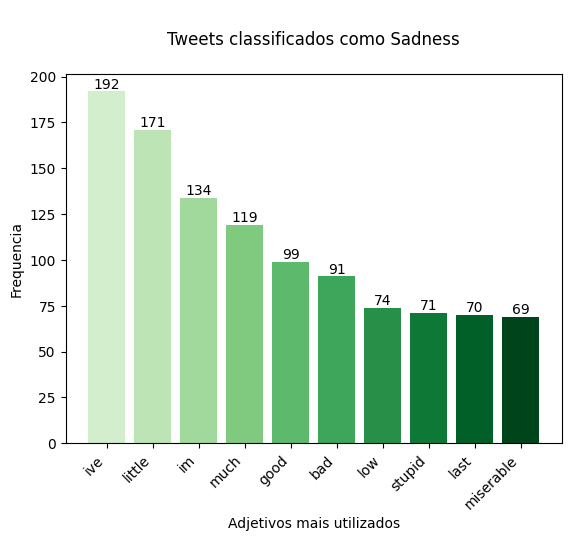

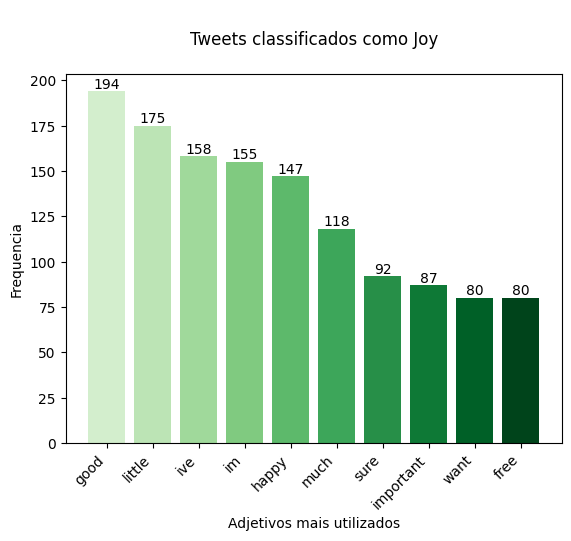

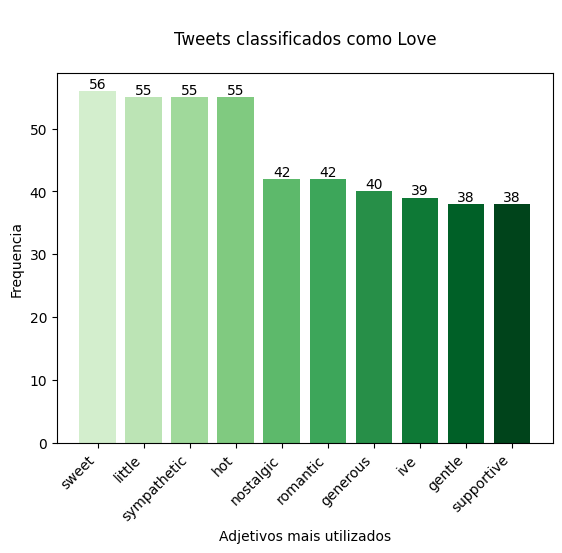

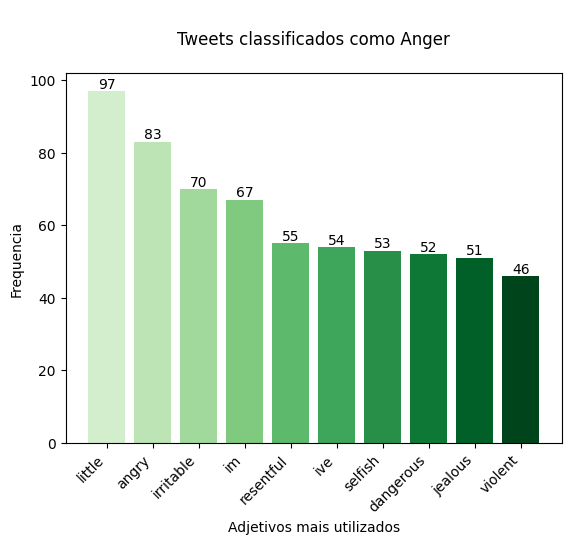

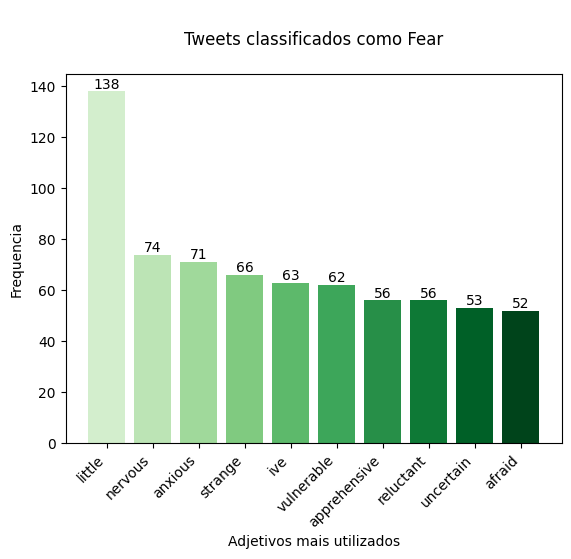

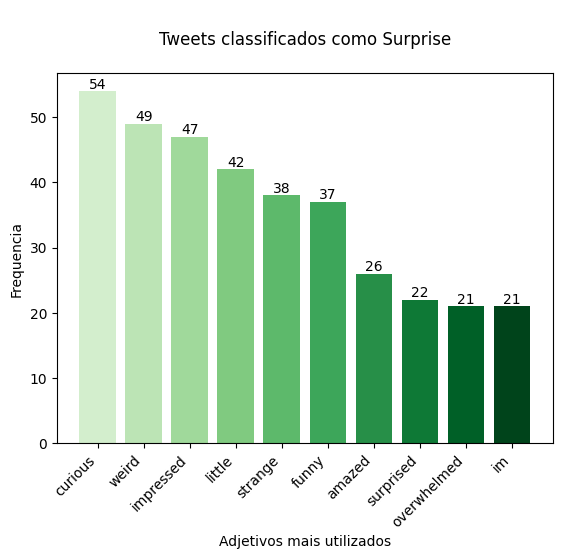

In [ ]:
tweets_train= preprocessar_tweets(tweets_train)
tweets_validation = preprocessar_tweets(tweets_validation)
tweets_test = preprocessar_tweets(tweets_test)
sadness = get_top_words_by_emotion(tweets_train,labels_train,0,'Sadness',10)
sadness = get_top_words_by_emotion(tweets_train,labels_train,1,'Joy',10)
sadness = get_top_words_by_emotion(tweets_train,labels_train,2,'Love',10)
sadness = get_top_words_by_emotion(tweets_train,labels_train,3,'Anger',10)
sadness = get_top_words_by_emotion(tweets_train,labels_train,4,'Fear',10)
sadness = get_top_words_by_emotion(tweets_train,labels_train,5,'Surprise',10)



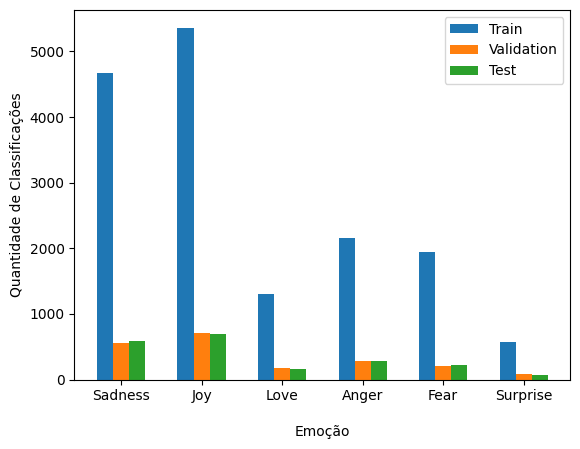

In [ ]:
# GRAFICO COM A CLASSIFICAÇÃO DE EMOÇÕES EM CADA DATASET

contagem_train  = dict(sorted((Counter(labels_train)).items()))
contagem_validation = dict(sorted((Counter(labels_validation)).items()))
contagem_test = dict(sorted((Counter(labels_test)).items()))
import matplotlib.pyplot as plt

emotions = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
train = contagem_train.values()
validation = contagem_validation.values()
test = contagem_test.values()

x = range(len(emotions))
largura_barra = 0.2

plt.bar(x, train, width=largura_barra, align="center", label="Train")
plt.bar([i+largura_barra for i in x], validation, width=largura_barra, align="center", label='Validation')
plt.bar([i+2*largura_barra for i in x], test, width=largura_barra, align="center", label='Test')

plt.xlabel('\nEmoção')
plt.ylabel('Quantidade de Classificações')
plt.xticks([i+largura_barra for i in x], emotions)
plt.legend()

'''# Adicionar números nas barras com tamanho de fonte menor
for i, v in enumerate(train):
    plt.text(i, v, str(v), ha='center', va='bottom', rotation=45, fontsize=8)
for i, v in enumerate(validation):
    plt.text(i+largura_barra, v, str(v), ha='center', va='bottom', rotation=45, fontsize=8)
for i, v in enumerate(test):
    plt.text(i+2*largura_barra, v, str(v), ha='center', va='bottom', rotation=45,  fontsize=8)'''

plt.show()


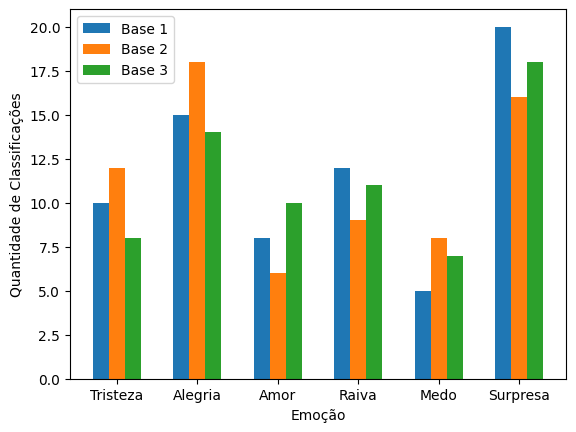

In [ ]:
import matplotlib.pyplot as plt

# Dados fictícios para ilustração
emoções = ['Tristeza', 'Alegria', 'Amor', 'Raiva', 'Medo', 'Surpresa']
base1 = [10, 15, 8, 12, 5, 20]
base2 = [12, 18, 6, 9, 8, 16]
base3 = [8, 14, 10, 11, 7, 18]

# Configuração dos dados para o gráfico
x = range(len(emoções))
largura_barra = 0.2

# Plotagem do gráfico de barras agrupadas
plt.bar(x, base1, width=largura_barra, align='center', label='Base 1')
plt.bar([i + largura_barra for i in x], base2, width=largura_barra, align='center', label='Base 2')
plt.bar([i + 2 * largura_barra for i in x], base3, width=largura_barra, align='center', label='Base 3')
# Configuração dos eixos e rótulos
plt.xlabel('Emoção')
plt.ylabel('Quantidade de Classificações')
plt.xticks([i + largura_barra for i in x], emoções)
plt.legend()

# Exibição do gráfico
plt.show()

